In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import scipy as sp
from sklearn.decomposition import PCA

In [26]:
np.random.default_rng(1234)

Generator(PCG64) at 0x2B86750E0

In [27]:
dim = [100,500,1000,2000,4000]
n = 1000
mean = np.zeros(dim[0]) 
cov = np.identity(dim[0]) 
samples = [np.random.multivariate_normal(mean ,cov, n)]
for j in range(1,5):
    previous_samples = samples[j-1]
    current_mean = np.zeros(dim[j]-dim[j-1])
    current_cov = np.identity(dim[j]-dim[j-1])
    samples.append(np.concatenate([previous_samples,np.random.multivariate_normal(current_mean , current_cov, n)],axis=1))


In [28]:
pca = PCA(n_components = 4)
pca_fit = [pca.fit(samples[i]) for i in range(5)]

In [29]:
print("Explained Variance Ratio Across All Dimensions: {}".format([(pca_fit[i].explained_variance_ratio_) for i in range(5)]))
print("First Four Principal Component Across All Dimensions: {}".format([(pca_fit[i].singular_values_ )for i in range(5)]))

Explained Variance Ratio Across All Dimensions: [array([0.002121  , 0.00211461, 0.00208414, 0.0020696 ]), array([0.002121  , 0.00211461, 0.00208414, 0.0020696 ]), array([0.002121  , 0.00211461, 0.00208414, 0.0020696 ]), array([0.002121  , 0.00211461, 0.00208414, 0.0020696 ]), array([0.002121  , 0.00211461, 0.00208414, 0.0020696 ])]
First Four Principal Component Across All Dimensions: [array([91.99561804, 91.85702714, 91.1926842 , 90.87402269]), array([91.99561804, 91.85702714, 91.1926842 , 90.87402269]), array([91.99561804, 91.85702714, 91.1926842 , 90.87402269]), array([91.99561804, 91.85702714, 91.1926842 , 90.87402269]), array([91.99561804, 91.85702714, 91.1926842 , 90.87402269])]


In [30]:
pca_fit_data = np.array([pca.fit_transform(samples[i]) for i in range(5)])

In [31]:
np.array(pca_fit_data).T.shape

(4, 1000, 5)

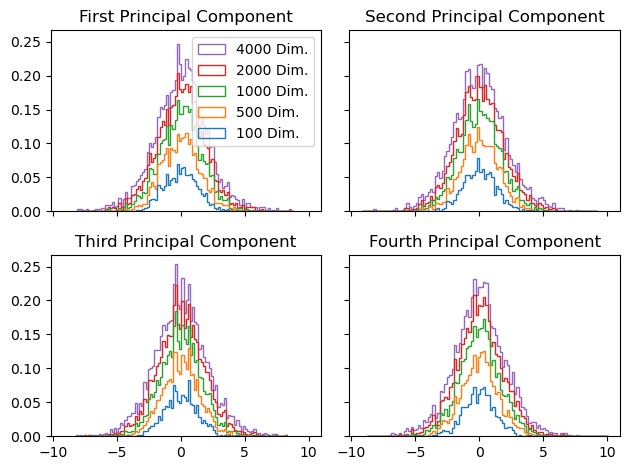

In [32]:

n_bins = 100

fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, sharex=True, sharey=True)

ax0.hist(pca_fit_data.T[0,:,:],
         n_bins,
         histtype='step',
         density = True,
         stacked=True,
         fill=False,
         label = ["{} Dim.".format(dim[0]),
                  "{} Dim.".format(dim[1]),
                  "{} Dim.".format(dim[2]),
                  "{} Dim.".format(dim[3]),
                  "{} Dim.".format(dim[4])])
ax0.set_title('First Principal Component')
ax0.legend()


ax1.hist(pca_fit_data.T[1,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax1.set_title('Second Principal Component')

ax2.hist(pca_fit_data.T[2,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax2.set_title('Third Principal Component')

# Make a multiple-histogram of data-sets with different length.
ax3.hist(pca_fit_data.T[3,:,:], n_bins, histtype='step', density = True, stacked=True, fill=False)
ax3.set_title('Fourth Principal Component')

fig.tight_layout()
plt.show()

In [36]:
test_of_means = [sp.stats.ttest_1samp(samples[i], 0, alternative= "less") for i in range(5)]

In [37]:
percentage = [np.sum(test_of_means[i].pvalue<.05)/dim[i] for i in range(5)]

In [38]:
percentage

[0.02, 0.054, 0.054, 0.051, 0.05175]